# Modelo de Clustering Ecommerce

## Modelo de clustering que se encargara de segmentar los clientes por pais segun el genero y la edad de lo clientes.

### **Celda 1: Instalacion de librerias**

In [23]:
"""
CELDA 1: Verificación de librerías necesarias
──────────────────────────────────────────────
"""

import sklearn
import pandas as pd
import numpy as np

print("✓ scikit-learn:", sklearn.__version__)
print("✓ pandas:", pd.__version__)
print("✓ numpy:", np.__version__)
print("\n✅ Librerías listas")

✓ scikit-learn: 1.6.1
✓ pandas: 2.2.2
✓ numpy: 2.0.2

✅ Librerías listas


### **Celda 2: Importacion de las librerias**

In [24]:
"""
CELDA 2: Importación de librerías
──────────────────────────────────
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

print("✅ Librerías importadas correctamente")

✅ Librerías importadas correctamente


### **Celda 3: Subir el DataSet al colab**

In [25]:
"""
CELDA 3: Cargar dataset limpio
──────────────────────────────
Sube el archivo CSV con las columnas: Age, Gender, Country, Total_Purchases
"""

from google.colab import files
import io

# Subir archivo
print("📤 Sube tu archivo CSV:")
uploaded = files.upload()

# Cargar
filename = list(uploaded.keys())[0]
df = pd.read_csv(io.BytesIO(uploaded[filename]))

print(f"\n✅ Dataset cargado: {filename}")
print(f"📊 Dimensiones: {df.shape}")

# Seleccionar columnas necesarias
df = df[['Age', 'Gender', 'Country', 'Total_Purchases']].copy()

# Limpiar valores nulos
print(f"\n🧹 Limpiando datos...")
registros_antes = len(df)
df = df.dropna()
df = df[(df['Age'] >= 5) & (df['Age'] <= 100)]
df = df[df['Total_Purchases'] >= 0]
print(f"   Registros: {registros_antes} → {len(df)}")

print(f"\n📊 Países encontrados: {sorted(df['Country'].unique())}")
print(f"✅ Dataset listo: {len(df)} clientes")

📤 Sube tu archivo CSV:


Saving dataset_columnas.csv to dataset_columnas (5).csv

✅ Dataset cargado: dataset_columnas (5).csv
📊 Dimensiones: (50000, 14)

🧹 Limpiando datos...
   Registros: 50000 → 50000

📊 Países encontrados: ['Australia', 'Canada', 'France', 'Germany', 'India', 'Japan', 'UK', 'USA']
✅ Dataset listo: 50000 clientes


### **CELDA 4: Aplicar Clustering por País**

In [26]:
"""
CELDA 4: Clustering K-Means por país
────────────────────────────────────
Aplica clustering usando Age (X) y Total_Purchases (Y)
"""

def aplicar_clustering(df, n_clusters=6):
    """
    Aplica K-Means a cada país por separado
    """
    print(f"\n{'='*70}")
    print(f"APLICANDO CLUSTERING: {n_clusters} GRUPOS POR PAÍS")
    print(f"{'='*70}\n")

    df_resultado = df.copy()
    df_resultado['Cluster'] = -1

    paises = sorted(df['Country'].unique())

    for pais in paises:
        # Filtrar país
        mask_pais = df['Country'] == pais
        df_pais = df[mask_pais]

        print(f"🌍 {pais}: {len(df_pais)} clientes")

        # Features: Age y Total_Purchases
        X = df_pais[['Age', 'Total_Purchases']].values

        # Normalizar
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)

        # K-Means
        kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        clusters = kmeans.fit_predict(X_scaled)

        # Asignar clusters
        df_resultado.loc[mask_pais, 'Cluster'] = clusters

        # Mostrar distribución
        unique, counts = np.unique(clusters, return_counts=True)
        print(f"   Distribución: {dict(zip(unique, counts))}")

    print(f"\n{'='*70}")
    print(f"✅ CLUSTERING COMPLETADO")
    print(f"{'='*70}")

    return df_resultado

# EJECUTAR (cambia n_clusters entre 5-7 según necesites)
N_CLUSTERS = 6
df_segmentado = aplicar_clustering(df, n_clusters=N_CLUSTERS)

print(f"\n✅ Variable creada: df_segmentado ({len(df_segmentado)} clientes)")


APLICANDO CLUSTERING: 6 GRUPOS POR PAÍS

🌍 Australia: 4061 clientes
   Distribución: {np.int32(0): np.int64(685), np.int32(1): np.int64(827), np.int32(2): np.int64(1290), np.int32(3): np.int64(654), np.int32(4): np.int64(594), np.int32(5): np.int64(11)}
🌍 Canada: 6023 clientes
   Distribución: {np.int32(0): np.int64(949), np.int32(1): np.int64(939), np.int32(2): np.int64(1180), np.int32(3): np.int64(1925), np.int32(4): np.int64(1018), np.int32(5): np.int64(12)}
🌍 France: 4013 clientes
   Distribución: {np.int32(0): np.int64(790), np.int32(1): np.int64(557), np.int32(2): np.int64(1275), np.int32(3): np.int64(768), np.int32(4): np.int64(619), np.int32(5): np.int64(4)}
🌍 Germany: 4925 clientes
   Distribución: {np.int32(0): np.int64(823), np.int32(1): np.int64(906), np.int32(2): np.int64(768), np.int32(3): np.int64(1582), np.int32(4): np.int64(13), np.int32(5): np.int64(833)}
🌍 India: 3512 clientes
   Distribución: {np.int32(0): np.int64(1106), np.int32(1): np.int64(544), np.int32(2): np

### **CELDA 5: Generar Gráficas por País **

GENERANDO GRÁFICAS POR PAÍS


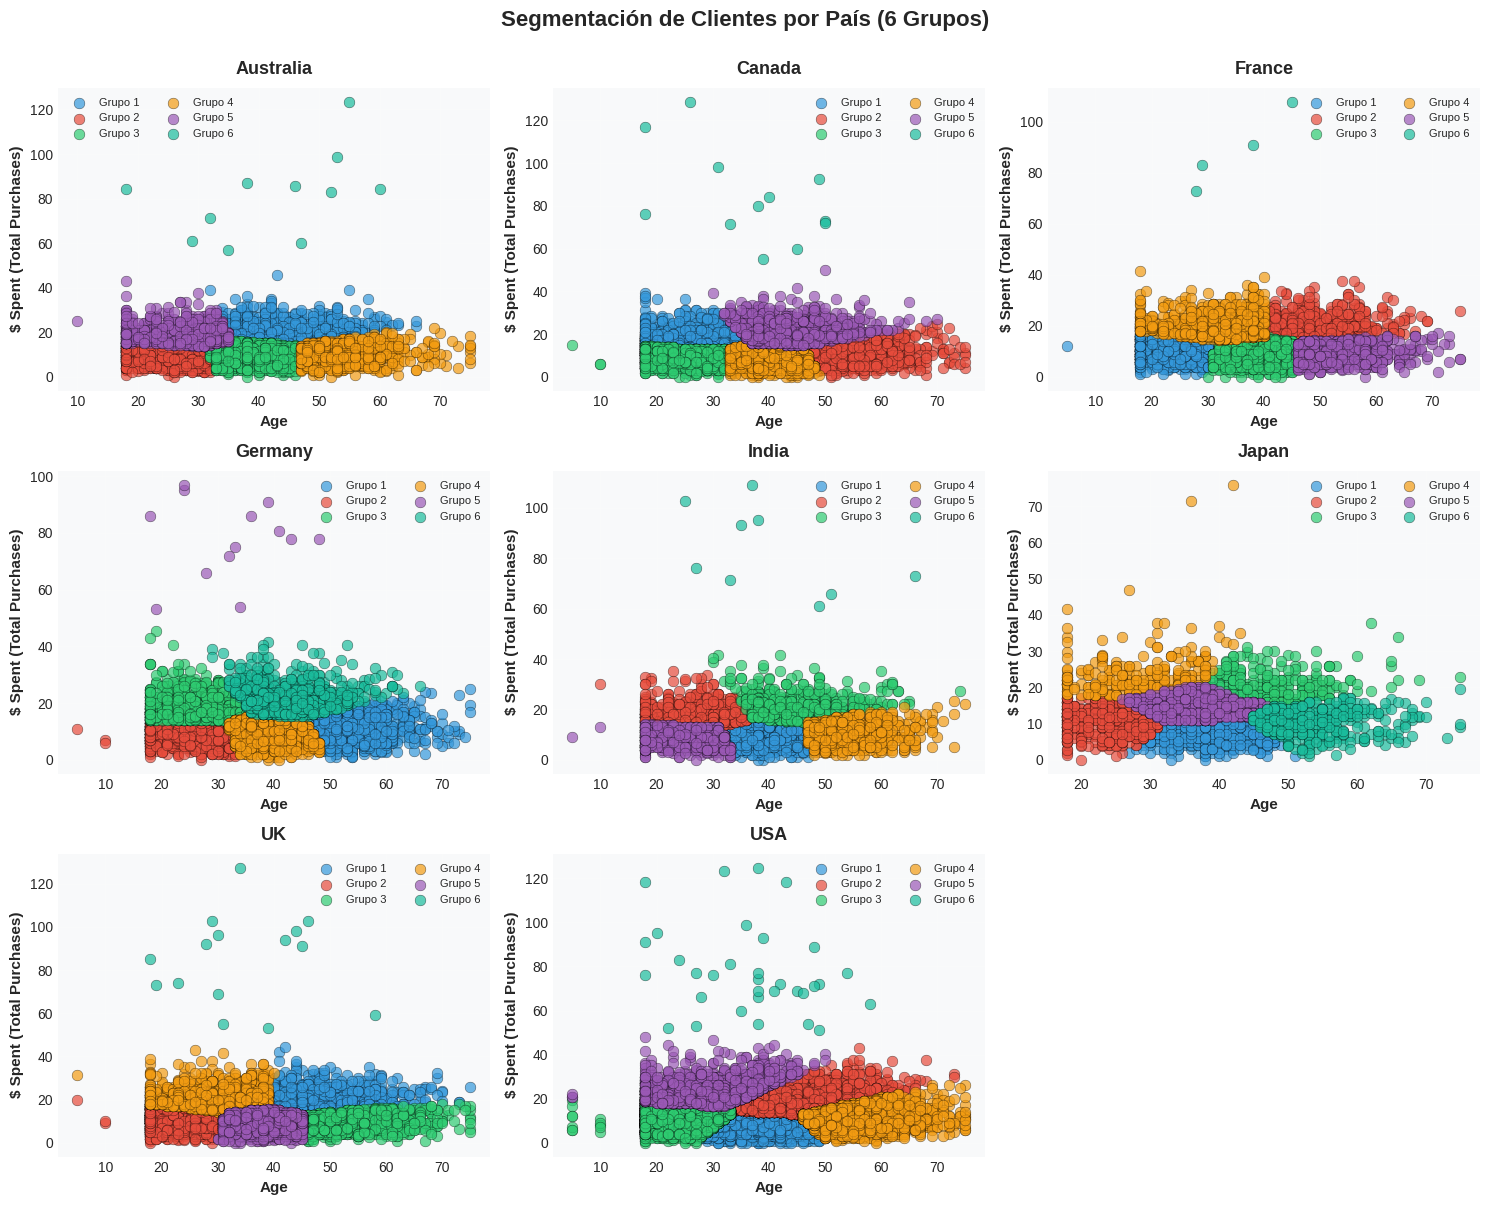


✅ Gráficas generadas para 8 países


In [27]:
"""
CELDA 5: Gráficas de clustering por país
─────────────────────────────────────────
Genera scatter plots: Age (X) vs Total_Purchases (Y)
Una gráfica por país con clusters en colores
"""

print("="*70)
print("GENERANDO GRÁFICAS POR PAÍS")
print("="*70)

# Paleta de colores
colores = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22']

# Obtener países
paises = sorted(df_segmentado['Country'].unique())
n_paises = len(paises)

# Configurar grid de subplots
if n_paises <= 4:
    rows, cols = 2, 2
elif n_paises <= 6:
    rows, cols = 2, 3
elif n_paises <= 9:
    rows, cols = 3, 3
else:
    rows, cols = 4, 3

# Crear figura
fig, axes = plt.subplots(rows, cols, figsize=(cols*5, rows*4))
if n_paises == 1:
    axes = [axes]
else:
    axes = axes.flatten()

# Generar gráfica para cada país
for idx, pais in enumerate(paises):
    ax = axes[idx]

    # Datos del país
    df_pais = df_segmentado[df_segmentado['Country'] == pais]

    # Plot por cluster
    for cluster_id in sorted(df_pais['Cluster'].unique()):
        df_cluster = df_pais[df_pais['Cluster'] == cluster_id]

        ax.scatter(
            df_cluster['Age'],
            df_cluster['Total_Purchases'],
            c=colores[cluster_id],
            label=f'Grupo {cluster_id+1}',
            s=60,
            alpha=0.7,
            edgecolors='black',
            linewidth=0.3
        )

    # Configuración
    ax.set_xlabel('Age', fontsize=11, fontweight='bold')
    ax.set_ylabel('$ Spent (Total Purchases)', fontsize=11, fontweight='bold')
    ax.set_title(f'{pais}', fontsize=13, fontweight='bold', pad=10)
    ax.legend(loc='best', fontsize=8, ncol=2)
    ax.grid(True, alpha=0.2)
    ax.set_facecolor('#f8f9fa')

# Ocultar ejes vacíos
for idx in range(n_paises, len(axes)):
    axes[idx].axis('off')

plt.suptitle(f'Segmentación de Clientes por País ({N_CLUSTERS} Grupos)',
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print(f"\n✅ Gráficas generadas para {n_paises} países")

### **Celda 6: Gráficas Individuales de Alta Calidad**

GRÁFICAS INDIVIDUALES POR PAÍS


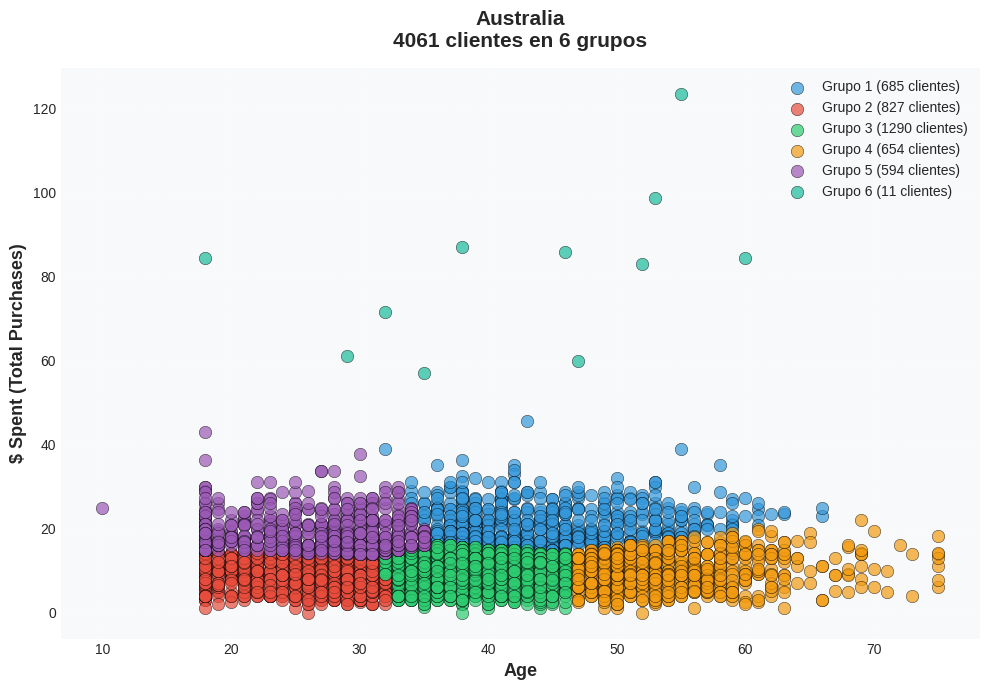

✅ Australia


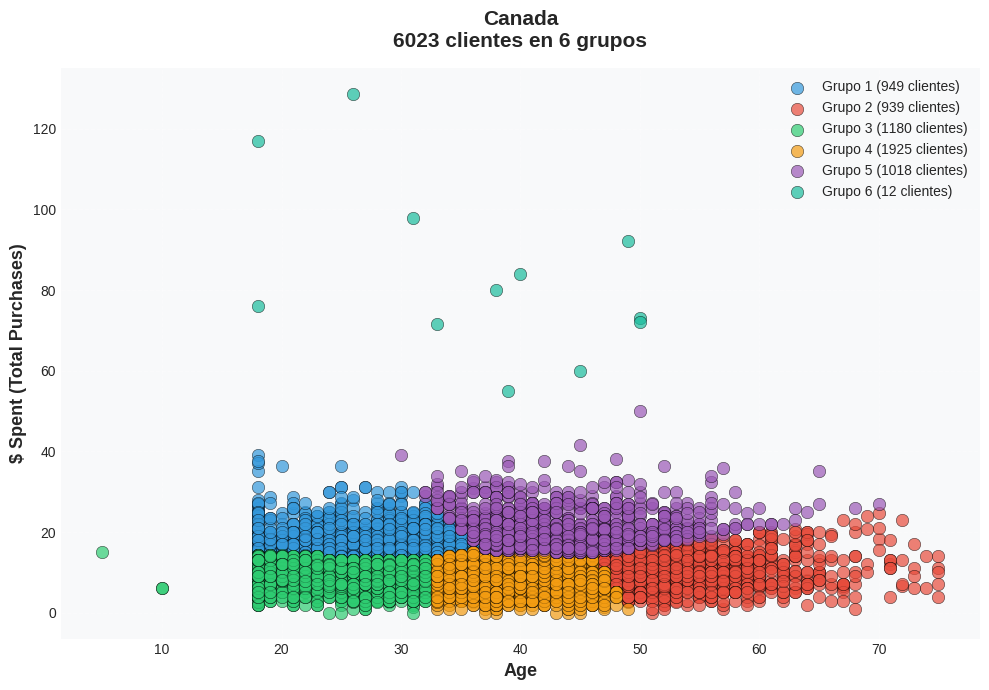

✅ Canada


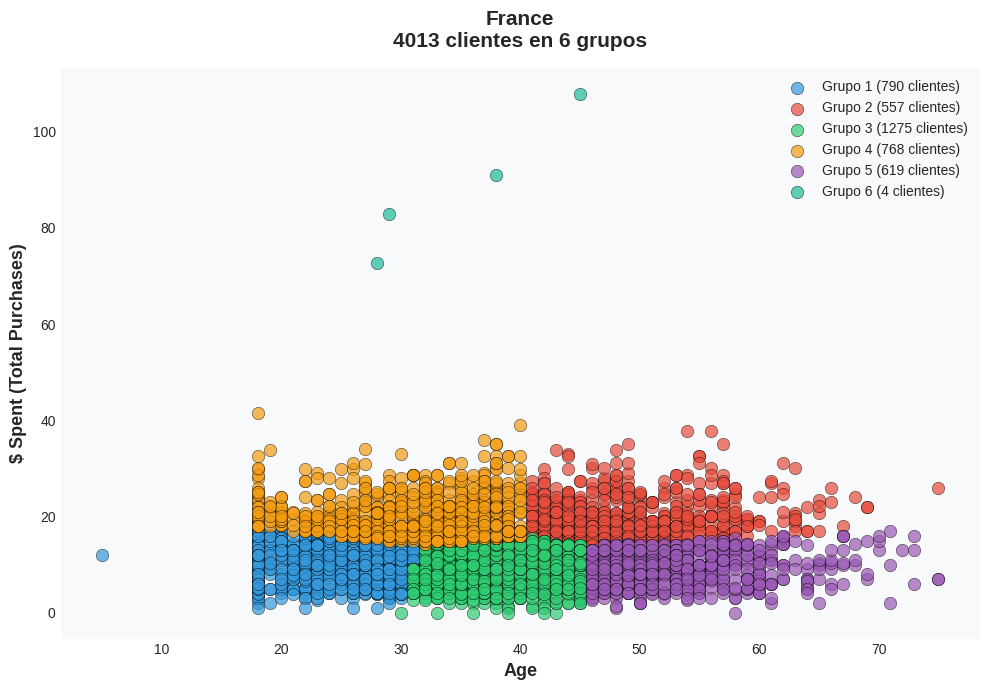

✅ France


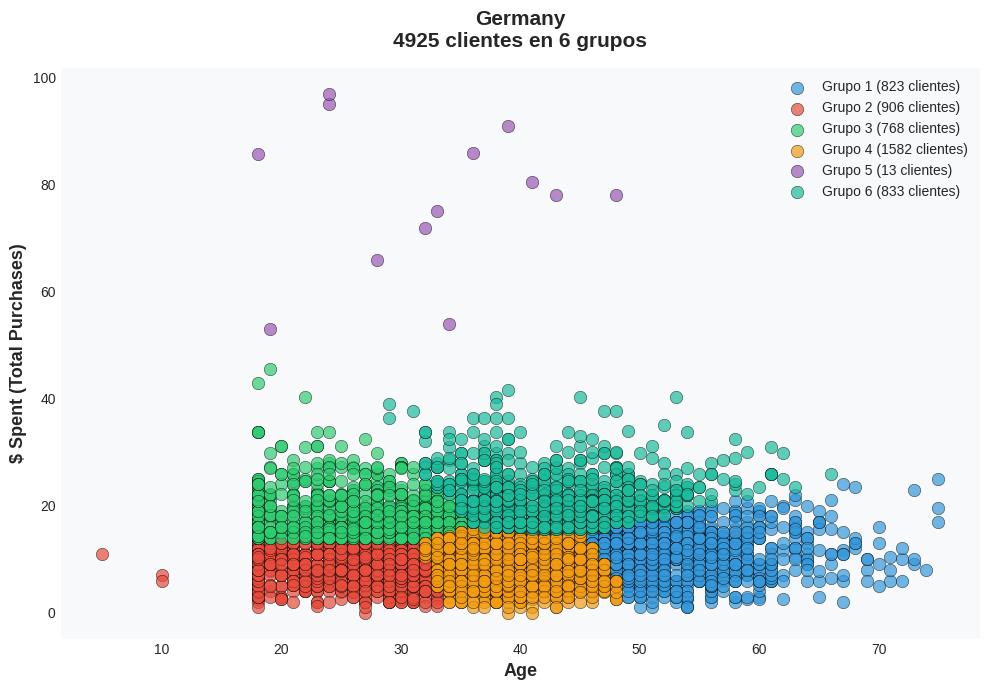

✅ Germany


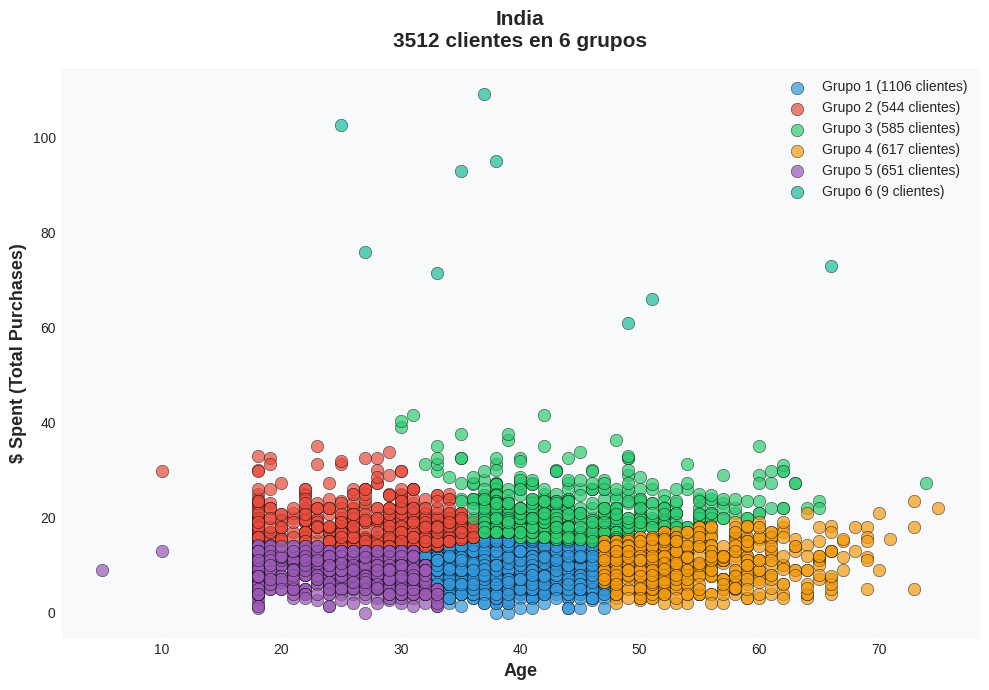

✅ India


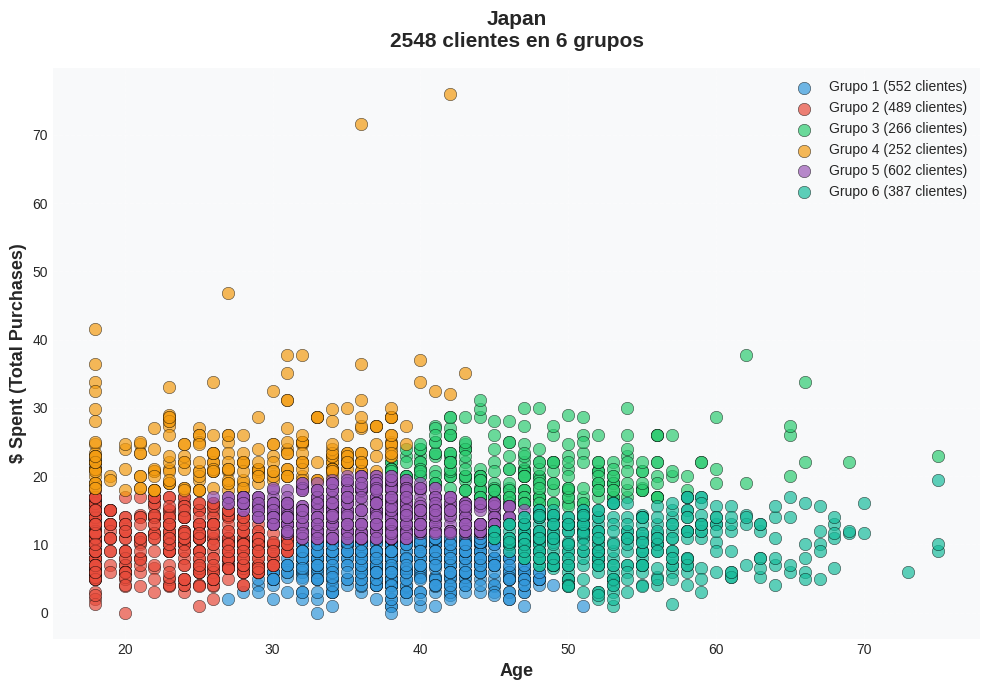

✅ Japan


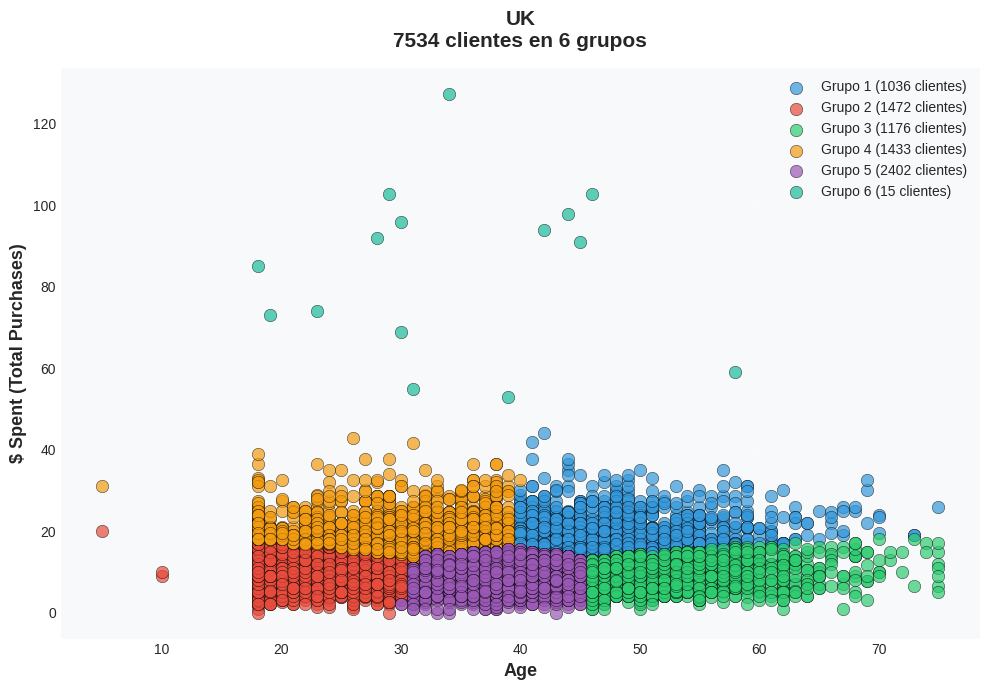

✅ UK


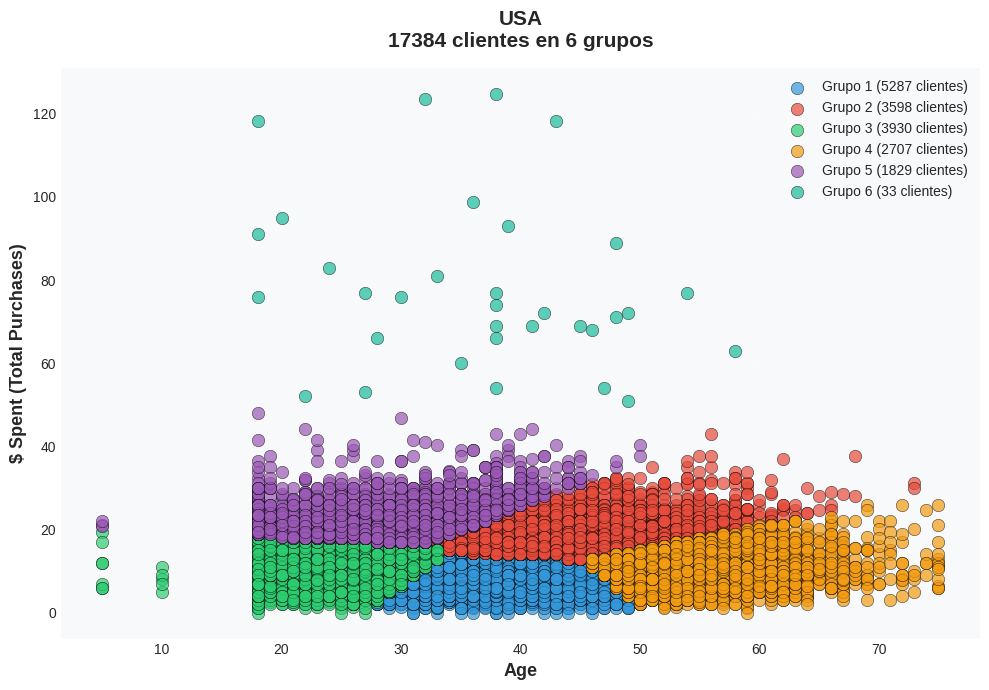

✅ USA

✅ Todas las gráficas generadas


In [28]:
"""
CELDA 6: Gráficas individuales grandes por país
────────────────────────────────────────────────
Genera una gráfica grande por cada país (estilo iteración)
"""

print("="*70)
print("GRÁFICAS INDIVIDUALES POR PAÍS")
print("="*70)

paises = sorted(df_segmentado['Country'].unique())
colores = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12', '#9b59b6', '#1abc9c', '#e67e22']

for pais in paises:
    # Datos del país
    df_pais = df_segmentado[df_segmentado['Country'] == pais]

    # Crear figura
    plt.figure(figsize=(10, 7))

    # Plot por cluster
    for cluster_id in sorted(df_pais['Cluster'].unique()):
        df_cluster = df_pais[df_pais['Cluster'] == cluster_id]
        n_clientes = len(df_cluster)

        plt.scatter(
            df_cluster['Age'],
            df_cluster['Total_Purchases'],
            c=colores[cluster_id],
            label=f'Grupo {cluster_id+1} ({n_clientes} clientes)',
            s=80,
            alpha=0.7,
            edgecolors='black',
            linewidth=0.4
        )

    # Estilo
    plt.xlabel('Age', fontsize=13, fontweight='bold')
    plt.ylabel('$ Spent (Total Purchases)', fontsize=13, fontweight='bold')
    plt.title(f'{pais}\n{len(df_pais)} clientes en {N_CLUSTERS} grupos',
              fontsize=15, fontweight='bold', pad=15)
    plt.legend(loc='best', fontsize=10, framealpha=0.9)
    plt.grid(True, alpha=0.3, linestyle='--')
    plt.gca().set_facecolor('#f8f9fa')

    plt.tight_layout()
    plt.show()

    print(f"✅ {pais}")

print(f"\n✅ Todas las gráficas generadas")

### **Celda 7: Estadísticas por País y Cluster**

In [31]:
"""
CELDA 7: Estadísticas detalladas
────────────────────────────────
Muestra información de cada cluster por país
"""

paises = sorted(df_segmentado['Country'].unique())

for pais in paises:
    print(f"\n{'='*70}")
    print(f"📊 {pais}")
    print(f"{'='*70}")

    df_pais = df_segmentado[df_segmentado['Country'] == pais]

    stats = []
    for cluster_id in sorted(df_pais['Cluster'].unique()):
        df_cluster = df_pais[df_pais['Cluster'] == cluster_id]

        stats.append({
            'Grupo': f'Grupo {cluster_id+1}',
            'Clientes': len(df_cluster),
            '%': f"{(len(df_cluster)/len(df_pais)*100):.1f}%",
            'Edad_Media': round(df_cluster['Age'].mean(), 1),
            'Edad_Rango': f"{int(df_cluster['Age'].min())}-{int(df_cluster['Age'].max())}",
            'Purchases_Media': round(df_cluster['Total_Purchases'].mean(), 1),
            'Purchases_Rango': f"{df_cluster['Total_Purchases'].min():.0f}-{df_cluster['Total_Purchases'].max():.0f}"
        })

    df_stats = pd.DataFrame(stats)
    print(df_stats.to_string(index=False))

print(f"\n{'='*70}")
print("✅ Estadísticas completas")


📊 Australia
  Grupo  Clientes     %  Edad_Media Edad_Rango  Purchases_Media Purchases_Rango
Grupo 1       685 16.9%        43.8      32-66             20.9           15-46
Grupo 2       827 20.4%        24.9      18-32              9.0            0-14
Grupo 3      1290 31.8%        38.9      32-46              9.8            0-16
Grupo 4       654 16.1%        54.2      47-75             10.0            0-22
Grupo 5       594 14.6%        26.5      10-35             19.3           14-43
Grupo 6        11  0.3%        42.3      18-60             81.5          57-124

📊 Canada
  Grupo  Clientes     %  Edad_Media Edad_Rango  Purchases_Media Purchases_Rango
Grupo 1       949 15.8%        27.4      18-36             18.6           14-39
Grupo 2       939 15.6%        54.5      47-75             10.6            0-25
Grupo 3      1180 19.6%        25.2       5-32              9.0            0-15
Grupo 4      1925 32.0%        39.5      33-49              9.3            0-16
Grupo 5      1018

### **Celda 8: Exportar Resultados**

In [30]:
"""
CELDA 8: Exportar datos a CSV
──────────────────────────────
Descarga el dataset segmentado
"""

# Exportar
df_segmentado.to_csv('clientes_segmentados.csv', index=False)
print("✅ Archivo 'clientes_segmentados.csv' creado")
print(f"   {len(df_segmentado)} clientes con {df_segmentado.columns.tolist()}")

# Resumen por país y cluster
resumen = []
for pais in sorted(df_segmentado['Country'].unique()):
    df_pais = df_segmentado[df_segmentado['Country'] == pais]
    for cluster_id in sorted(df_pais['Cluster'].unique()):
        df_cluster = df_pais[df_pais['Cluster'] == cluster_id]
        resumen.append({
            'Pais': pais,
            'Grupo': f'Grupo {cluster_id+1}',
            'N_Clientes': len(df_cluster),
            'Edad_Promedio': round(df_cluster['Age'].mean(), 1),
            'Purchases_Promedio': round(df_cluster['Total_Purchases'].mean(), 2)
        })

df_resumen = pd.DataFrame(resumen)
df_resumen.to_csv('resumen_clusters.csv', index=False)
print("✅ Archivo 'resumen_clusters.csv' creado\n")

# Descargar
from google.colab import files
print("📥 Descargando archivos...")
files.download('clientes_segmentados.csv')
files.download('resumen_clusters.csv')

print("\n✅ Archivos descargados")

✅ Archivo 'clientes_segmentados.csv' creado
   50000 clientes con ['Age', 'Gender', 'Country', 'Total_Purchases', 'Cluster']
✅ Archivo 'resumen_clusters.csv' creado

📥 Descargando archivos...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Archivos descargados
